In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("tableau_ready_sentiment_data.csv")

features = [
    "roberta_pos_score",
    "roberta_neg_score",
    "roberta_neu_score",
    "sentiment_polarity",
    "engagement_score"
]

target = "pct_change"

df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]


In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
##RandomTreeForest and XGBoost seem to be the most promising based on our data

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


In [5]:
##evaluation of each model
##note our group used these metrics cause our model is trying to predict % change instead of a binary target
##so the error scores are more useful 
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"  MAE:  {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"  MSE:  {mean_squared_error(y_true, y_pred):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"  R²:   {r2_score(y_true, y_pred):.4f}")


In [6]:
##printing evaluation of each model
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)



Random Forest Evaluation:
  MAE:  2.4367
  MSE:  9.5523
  RMSE: 3.0907
  R²:   -0.0858

XGBoost Evaluation:
  MAE:  2.3851
  MSE:  9.2513
  RMSE: 3.0416
  R²:   -0.0516


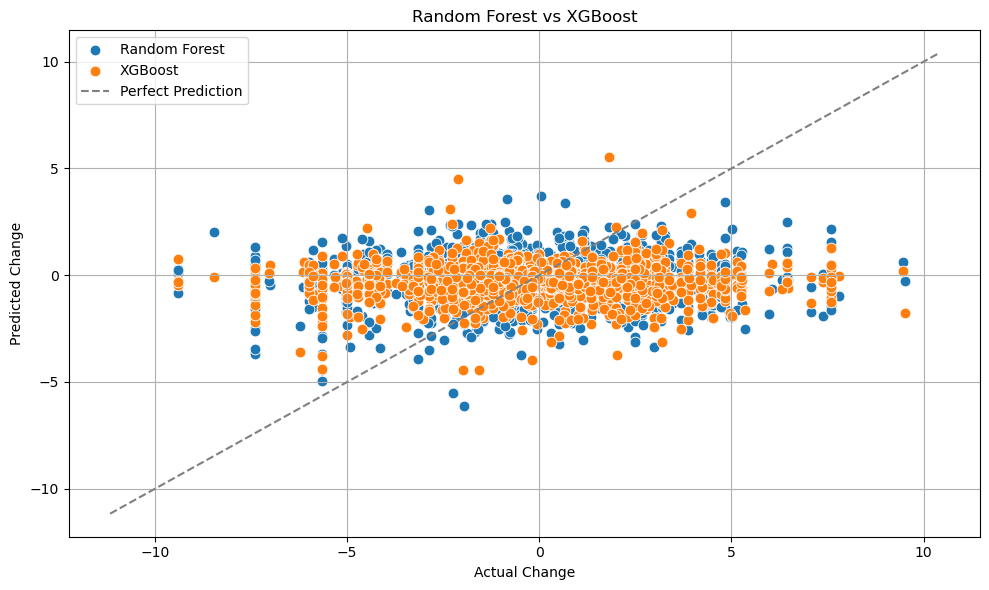

In [7]:
##plotting results
##used a scatter plot because as mentioned above, we don't have a binary target
##we need to see where is model's prediction landed
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_preds, label='Random Forest', s=60)
sns.scatterplot(x=y_test, y=xgb_preds, label='XGBoost', s=60)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray', label='Perfect Prediction')
plt.xlabel("Actual Change")
plt.ylabel("Predicted Change")
plt.title("Random Forest vs XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
##while these results are not super promising, the XGBoost is slightly more accurate
##due to time we will have to go with it to make sure we have a model by due date

##If anything, this is useful is proving that tweets do not have much prediction power on stock price

In [9]:
import joblib
joblib.dump(xgb_model, "model_pipeline.pkl")  


['model_pipeline.pkl']